# Implementation of Artificial Neural Network

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simplePreprocessor import SimplePreprocessor
from deepNN import DNN
from utils import SAVE

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

In [130]:
df = pd.read_csv('dataset_NN.csv').sample(frac=1, random_state=32)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.head()

,att1,att2,att3,att4,att5,att6,class
1496,0.0,2.0,0.0,153.950861,1.815847,5858.313683,8
270,0.0,3.0,1.0,136.583861,1.351292,3403.983588,2
611,0.0,3.0,1.0,200.734861,2.173116,12567.869557,4
938,0.0,3.0,1.0,155.934861,1.680711,7086.939401,5
572,0.0,2.0,0.0,190.298861,1.985512,11316.466084,3


In [131]:
preprocessor = SimplePreprocessor()

In [132]:
X.head()

,att1,att2,att3,att4,att5,att6
1496,0.0,2.0,0.0,153.950861,1.815847,5858.313683
270,0.0,3.0,1.0,136.583861,1.351292,3403.983588
611,0.0,3.0,1.0,200.734861,2.173116,12567.869557
938,0.0,3.0,1.0,155.934861,1.680711,7086.939401
572,0.0,2.0,0.0,190.298861,1.985512,11316.466084


In [133]:
X = X.to_numpy()
y = y.to_numpy()

In [134]:
y = preprocessor.OneHot(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [135]:
y.shape, X.shape

((10, 2000), (2000, 6))

In [136]:
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X.T, y, test_size=0.3)

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6, 1400), (6, 600), (10, 1400), (10, 600))

In [138]:
ARCHITECTURE_1 = {
    'layer_dims' : [X_train.shape[0], 64, 32, y_train.shape[0]],
    'lRate' : 0.001,
    'epochs' : 40000,
    'activation' : 'ReLu',
    'initializer' : 'Random',
    'GD_type' : 'BatchGD',
    'batch_size' : None,
    'optimizer' : None,
    'momentum' : None,
    'Regularizer' : None,
    'Regularizer_const' : None,
}
MODEL1 = DNN(ARCHITECTURE_1['layer_dims'], lRate=ARCHITECTURE_1['lRate'], epochs=ARCHITECTURE_1['epochs'],
activation=ARCHITECTURE_1['activation'], initializer=ARCHITECTURE_1['initializer'],
GD_type=ARCHITECTURE_1['GD_type'], batch_size=ARCHITECTURE_1['batch_size'],
optimizer=ARCHITECTURE_1['optimizer'], momentum=ARCHITECTURE_1['momentum'],
regularizer=ARCHITECTURE_1['Regularizer'], regularizer_const=ARCHITECTURE_1['Regularizer_const'])


costs1 = MODEL1.fit(X_train, y_train, print_cost=True)
train_acc = MODEL1.accuracy(X_train, y_train)
test_acc = MODEL1.accuracy(X_test, y_test)
SAVE(ARCHITECTURE_1, train_acc, test_acc)
print(f'Train Acc : {train_acc}')
print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (16, 32)', 'b shape : (16, 1)')
('Layer 4 W shape : (10, 16)', 'b shape : (10, 1)')
Cost after iteration0: 0.11955187594028537
Cost after iteration50: 0.04190513138733692
Cost after iteration100: 0.03714468743510571
Cost after iteration150: 0.036265384759236
Cost after iteration200: 0.03591729649792047
Cost after iteration250: 0.03569511321386912
Cost after iteration300: 0.03550273698631595
Train Acc : 0.7471428571428571
Test Acc : 0.755


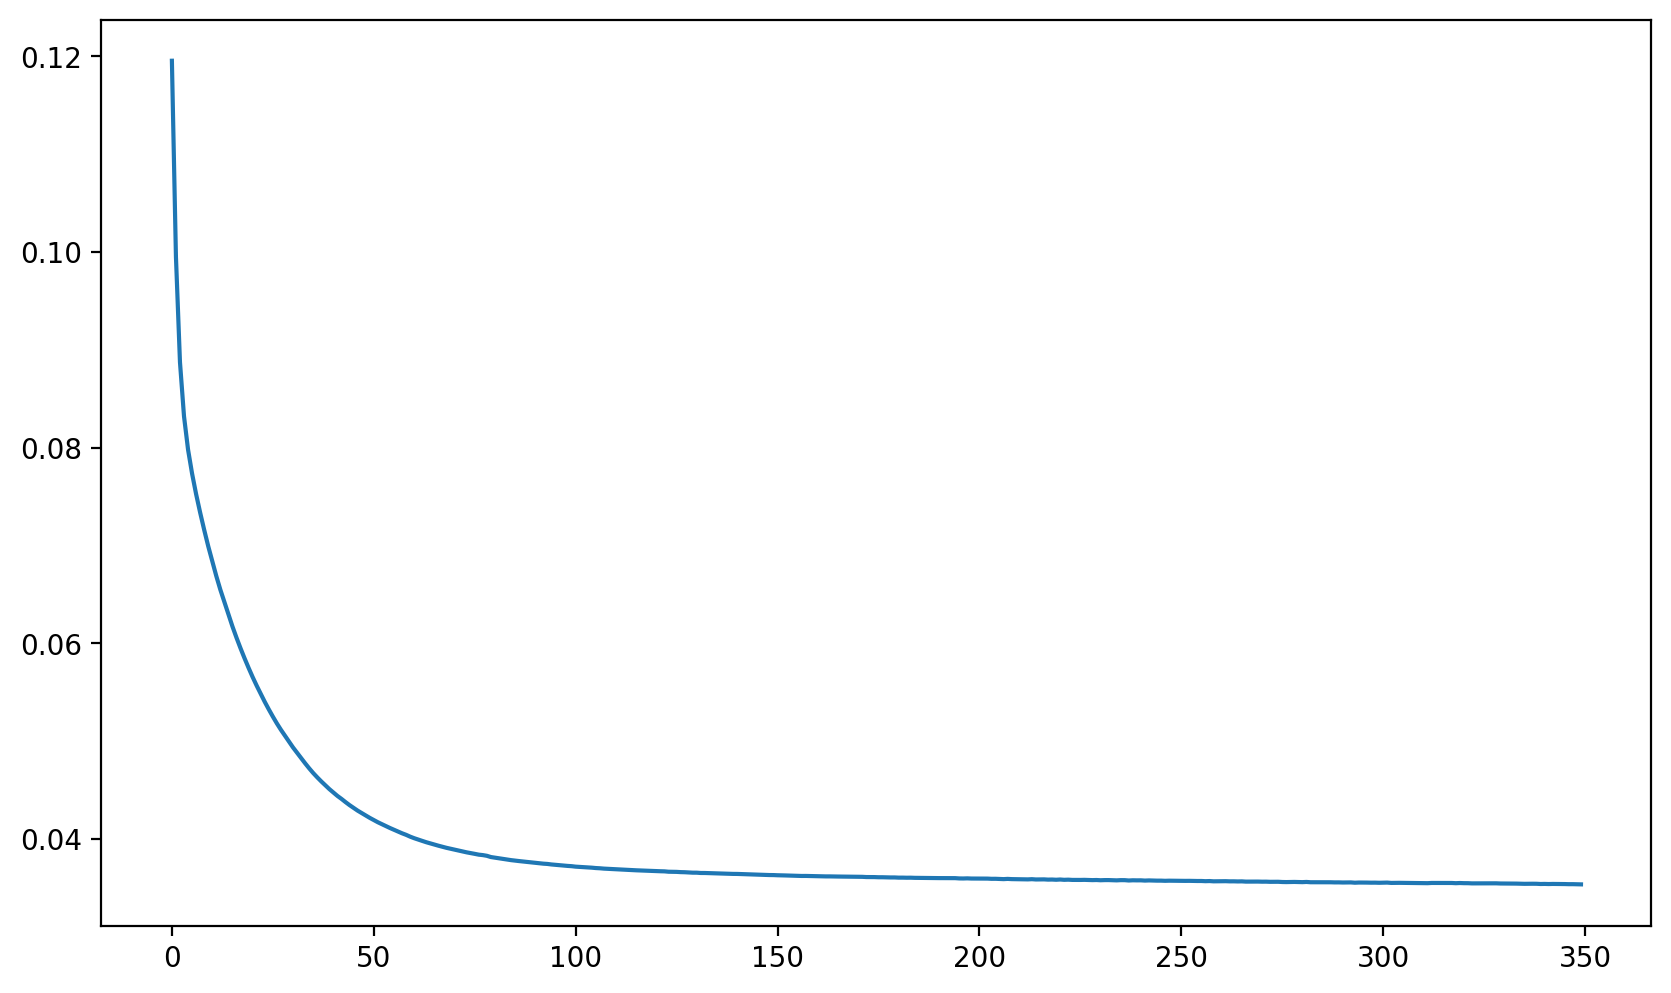

In [139]:
plt.plot(np.squeeze(costs1))
plt.show()